# The Sparks Foundation GRIP

## **Author:** Khaled Farghaly Khalifa

## **Task 1:** Score Student Prediction using Supervised ML



---



### Import the main Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joblib

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load the Dataset

In [3]:
# Read the CSV file using pandas and show first 5 rows
path = 'student_scores.csv'
df_students = pd.read_csv(path)

df_students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Show some statistics about the Dataset
df_students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Exploratory Data Analysis

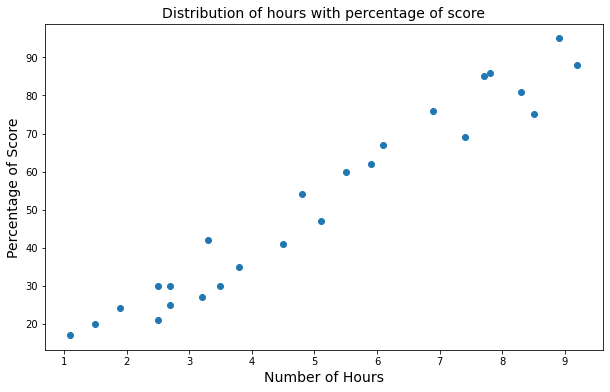

In [17]:
# Scatterplot with important Feature (Hours) with the target (Scores)
plt.figure(figsize=(10, 6))
plt.scatter(df_students['Hours'], df_students['Scores'])
plt.title('Distribution of hours with percentage of score', fontsize=14, c='k')
plt.xlabel('Number of Hours', fontsize=14, c='k')
plt.ylabel('Percentage of Score', fontsize=14, c='k')
plt.show()



> It seems that is a high positive correlation between the number of hours studied and percentage of score.



### Split the Dataset

In [57]:
# Split the whole Dataset to Feature & Target
X = df_students.iloc[:, :-1].values  # Features
y = df_students.iloc[:, 1].values   # target

In [62]:
# Random split the dataset to two sets (train_set, test_set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check Shapes of these Sets
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (20, 1)
X_test shape:  (5, 1)


### Building ML Model

In [63]:
# LinearRegression Model
linear_regressor =  LinearRegression()

linear_regressor.fit(X_train, y_train)

LinearRegression()

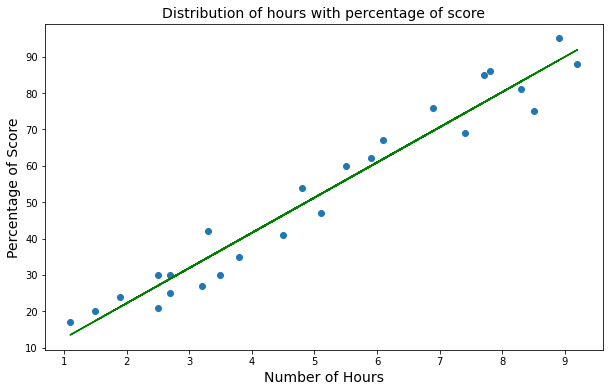

In [85]:
# Plot the regression line
line = linear_regressor.coef_ * X + linear_regressor.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, line, c='g')
plt.title('Distribution of hours with percentage of score', fontsize=14, c='k')
plt.xlabel('Number of Hours', fontsize=14, c='k')
plt.ylabel('Percentage of Score', fontsize=14, c='k')
plt.show()

In [86]:
# Get Prediction
y_pred = linear_regressor.predict(X_test)

print('Actual: ', y_test)
print('Predicted: ',y_pred)

Actual:  [81 30 21 76 62]
Predicted:  [83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


### Evaluation Metric: MSE & RMSE

In [78]:
# Check scores of this Model (MSE & RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))

Mean Squared Error: 18.94
Root Mean Squared Error: 4.35


### Predict Score if a student studies for 9.25 hours/day

In [74]:
# Test with your own data
hours = 9.25
pred_score = linear_regressor.predict([[hours]])

print("Number of Hours: ", hours)
print("Predicted Score: {:.2f} %".format(pred_score[0]))

Number of Hours:  9.25
Predicted Score: 92.39 %


### Download the  Model

In [88]:
# Download using joblib
joblib.dump(linear_regressor, 'model_Linear_Regression.pkl')

['model_Linear_Regression.pkl']

### Load the Model

In [89]:
# to load this pretrained Model
loaded_model = joblib.load('model_Linear_Regression.pkl')

# Test loaded model with your own data
hours = 10
pred_score = loaded_model.predict([[hours]])

print("Number of Hours: ", hours)
print("Predicted Score: {:.2f} %".format(pred_score[0]))

Number of Hours:  10
Predicted Score: 99.65 %
